In [2]:
import os
import pandas as pd
import numpy as np
import itertools
import scipy
import matplotlib.pyplot as plt

import pickle

In [10]:
# Full comparison


def kuncheva_index_per_seed(Coinidence_by_seed):
    kuncheva = []
    n = len(Coinidence_by_seed[0]) +1

    Kuncheva = []
    for i in range( len(Coinidence_by_seed[0])):

        kuncheva = []

        k = i + 1
        for j in range(len(Coinidence_by_seed)):
            r = 2*k * (Coinidence_by_seed[j][i])/(1 + Coinidence_by_seed[j][i] )
            kuncheva.append((r*n - k**2)/ k / (n - k))
    
        Kuncheva.append(kuncheva)
    
    return Kuncheva

def kuncheva_index_full(list_full):
    
    n = len(list_full) +1 #numer of initial index
    #t = scipy.special.binom(len(list_full), 2)

    Kuncheva = []
    for i in range( len(list_full)):

        k = i + 1
        
        r = len(list_full[i])
        #Kuncheva.append((r-(k**2/n))/(k-(k**2/n)))
        
        Kuncheva.append((r*n - k**2)/ k / (n - k))
    
    
    return Kuncheva


def per_seed_comp(index_CRFE, index_RFE, semilla ): # Seed is like "fold"

    coincidences = []
    for t in range(len(index_CRFE[0])):

        auxiliar = list(itertools.chain(*[index_CRFE[semilla][t]] + [index_RFE[semilla][t]] ))
    
        auxiliar = list(set(auxiliar))
     
        ele_repeated_in = []
        for ele in auxiliar:
            
            if ele in index_RFE[semilla][t]:  
                if ele in index_CRFE[semilla][t]:  

                    ele_repeated_in.append(ele)  # Diccionario con las veces que se repite cada elemento (keys) 
    
        coincidences.append(len(ele_repeated_in)/len(auxiliar))


    return coincidences


def Partial_coincidence(coincidences, num_of_coinc):
    
    percentage_of_repetaed_list = []
    Keys_list = []                      #keys
    Seeds_list = []                     #seeds ehre the key is repeated
    for t in range(len(coincidences)):

        list_of_keys = list(coincidences[t].keys())
        #list_of_values = list(coincidences[t].values())

        keys_list = []  #keys
        seeds_list = [] #seeds ehre the key is repeated
        count = 0
        for key in list_of_keys: # list_of_keys are all the features observed at step t

            #coincidences[t][key] is the list of seeds in which feature "key" is observed at time "t"
            if len(coincidences[t][key]) >= num_of_coinc: #>= because is "at" least

                count += 1
                seeds_list.append(coincidences[t][key])
                keys_list.append(list_of_keys)
        
        Seeds_list.append(seeds_list)
        Keys_list.append(keys_list)
        percentage_of_repetaed_list.append(count/len(list_of_keys)) # this is because the division is by all the features present

    #print(Seeds_list , Keys_list)
    return [percentage_of_repetaed_list, Seeds_list , Keys_list]



def FSR(list_ ):

    k = len(list_)
    #print(k)
    denominador = np.sum(range( k + 1, k*2 + 1  ))
    #print(denominador )
    numerador = np.linspace(k , k*2, num =  k + 1).tolist() 
    numerador.reverse()
    #print(numerador)
    w_j = [ele/denominador for ele in numerador]
    #print(w_j)

    out = []
    for t in range(len(list_[0])):

        FSR = 0
        for j in range(len(list_)):

            FSR = FSR + w_j[j] * list_[j][t] # first seed, then time
 
        out.append(FSR)

    return out



def consistency_2(file):

    
    # read the dictionary from the file
    with open(r'../DATA/CRFE_both_' +  file + '.pickle', 'rb') as f:
        OUT_crfe = pickle.load(f)

    with open(r'../DATA/RFE_both_' +  file + '.pickle', 'rb') as f:
        OUT_rfe = pickle.load(f)


    index_CRFE = [ele["Index"] for ele in OUT_crfe ] 
    index_RFE = [ele["Index"] for ele in OUT_rfe ] 


    coincidences = []
    for t in range( len(index_CRFE[0])):

        auxiliar_crfe = []
        auxiliar_rfe = []
        for lst in range(len(index_CRFE)):
            auxiliar_crfe.extend(index_CRFE[lst][t]) 
            auxiliar_rfe.extend(index_RFE[lst][t])  

        auxiliar = auxiliar_crfe + auxiliar_rfe
        auxiliar = list(set(auxiliar ))
    
  
        ele_repeated_in = {}
        for ele in auxiliar:

            Seeds_CRFE = []
            Seeds_RFE = []
            for seed in range(len(index_CRFE)):

                if ele in index_CRFE[seed][t]:  
                    Seeds_CRFE.append(seed)
                
                if ele in index_RFE[seed][t]:  
                    Seeds_RFE.append(seed + len(index_CRFE))

             

            ele_repeated_in[ele] = Seeds_CRFE + Seeds_RFE  # Diccionario con las veces que se repite cada elemento (keys) 
           
        coincidences.append(ele_repeated_in)


    Coinidence_by_seed = []
    for i in range(len(index_CRFE)):
    #print(index_CRFE, index_RFE, i)
        list_ = per_seed_comp(index_CRFE, index_RFE, i)
        list_.reverse()  # list with percentage of coinidence by seed
        #list_ = [ele for ele in list_]
        Coinidence_by_seed.append(list_) 


    #Let´s take the mean and std for representation
    
    mean_semillas = np.mean(np.array(Coinidence_by_seed), axis=0).tolist()
    std_dev_semillas = np.std(np.array(Coinidence_by_seed), axis=0).tolist()

    kuncheva_scores = kuncheva_index_per_seed(Coinidence_by_seed)

    mean_semillas_kuncheva = np.mean(np.array(kuncheva_scores), axis=1).tolist()
    std_dev_semillas_kuncheva = np.std(np.array(kuncheva_scores), axis=1).tolist()

    y = [*range(1 , len(index_CRFE[0]) + 1)]




    return coincidences, index_CRFE, index_RFE, mean_semillas, std_dev_semillas, mean_semillas_kuncheva, std_dev_semillas_kuncheva



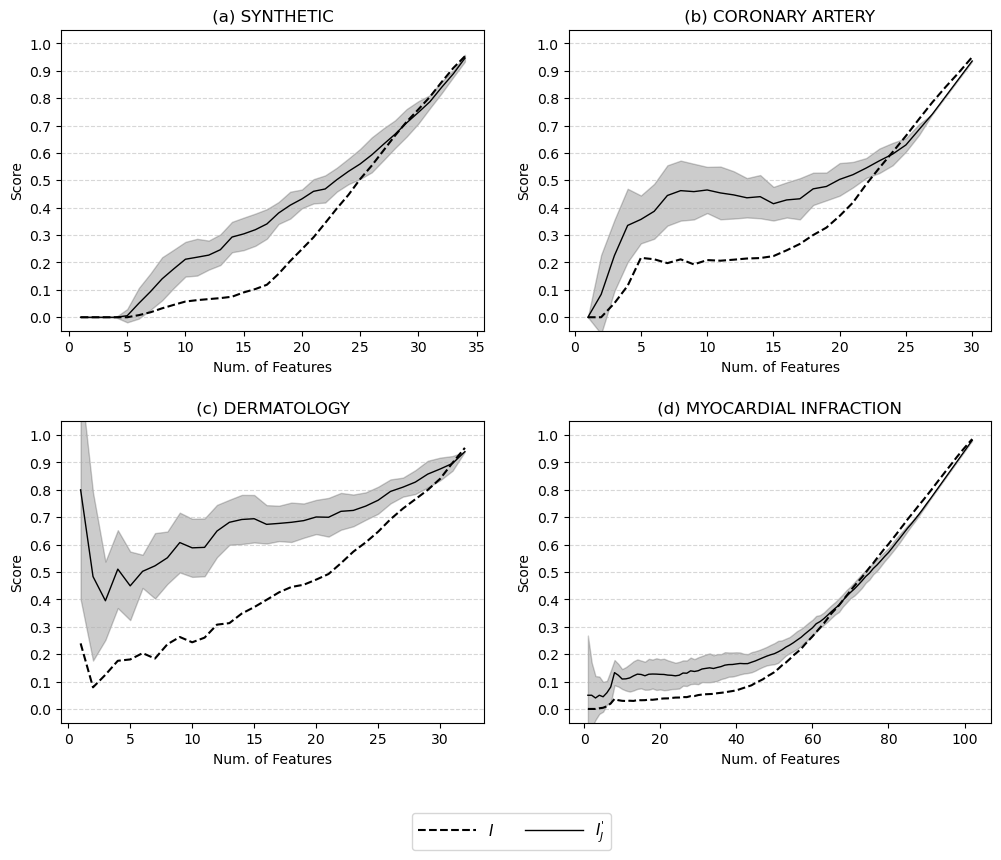

<Figure size 640x480 with 0 Axes>

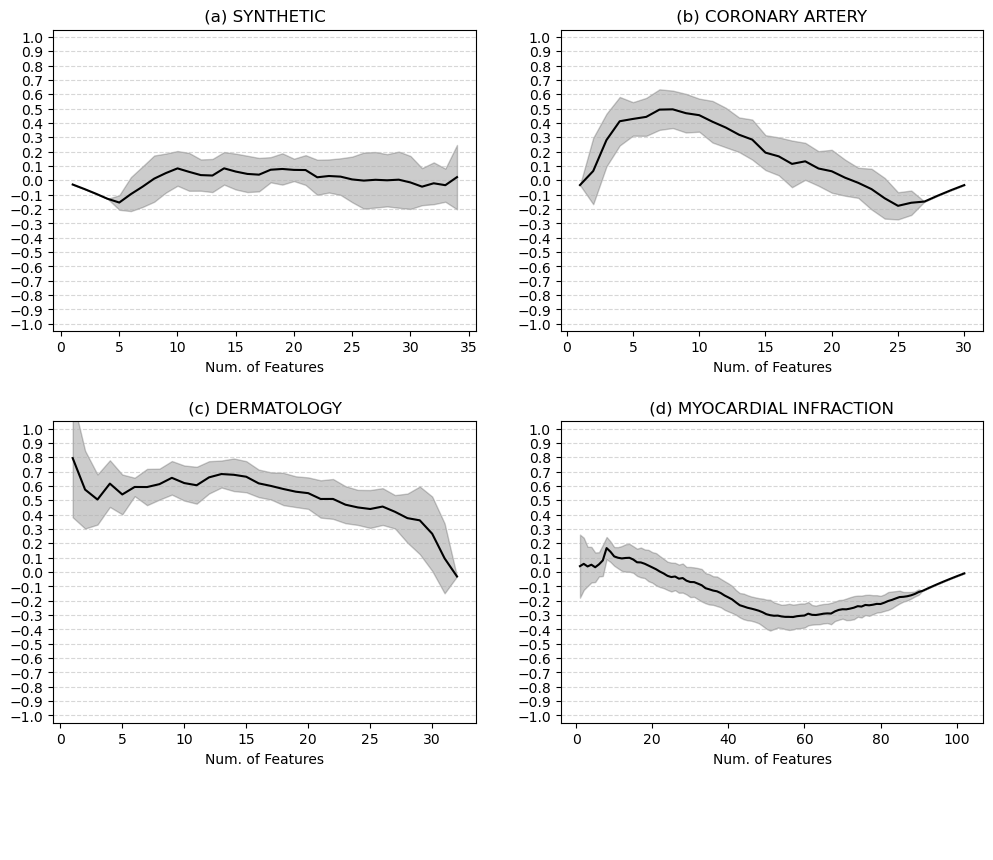

<Figure size 640x480 with 0 Axes>

In [47]:




coincidences_30, index_CRFE_30, index_RFE_30, mean_semillas_30, std_dev_semillas_30, mean_semillas_kuncheva_30, std_dev_semillas_kuncheva_30 = consistency_2("30")
coincidences_31, index_CRFE_31, index_RFE_31, mean_semillas_31, std_dev_semillas_31, mean_semillas_kuncheva_31, std_dev_semillas_kuncheva_31 = consistency_2("31")
coincidences_32, index_CRFE_32, index_RFE_32, mean_semillas_32, std_dev_semillas_32, mean_semillas_kuncheva_32, std_dev_semillas_kuncheva_32 = consistency_2("32")
coincidences_33, index_CRFE_33, index_RFE_33, mean_semillas_33, std_dev_semillas_33, mean_semillas_kuncheva_33, std_dev_semillas_kuncheva_33 = consistency_2("33")

y_30 = [*range(1 , len(index_CRFE_30[0]) + 1)]
y_31 = [*range(1 , len(index_CRFE_31[0]) + 1)]
y_32 = [*range(1 , len(index_CRFE_32[0]) + 1)]
y_33 = [*range(1 , len(index_CRFE_33[0]) + 1)]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 9))
plt.subplots_adjust(hspace=0.3)

#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 4))
# Create the common legend



List_ = []
for i in range(len(index_RFE_30) + 1, len(index_RFE_30)*2 + 1 ):
    list_ = Partial_coincidence(coincidences_30, i)[0] 
    #list_ = per_seed_comp(index_CRFE, index_RFE, i)    
    list_.reverse()
    #list_ = [ele for ele in list_]
    List_.append(list_)


fsr = FSR(List_ )

ax1.plot(y_30, fsr, label = "$I$",  markersize=5, linestyle= "--", color = "black")


ax1.plot(y_30, mean_semillas_30, color = "black", 
            label =  "$I_J^'$" , markersize=1.5, 
            linestyle='-', linewidth=1)
        
ax1.fill_between(y_30, np.array(mean_semillas_30) + np.array(std_dev_semillas_30),
                np.array(mean_semillas_30) - np.array(std_dev_semillas_30), 
                alpha=0.2, color = "black")

    



#List with percentage of features present in all seeds.

list_full = Partial_coincidence(coincidences_30, len(index_RFE_30) + len(index_CRFE_30))[0] 
list_full.reverse()
#list_full = [ele *100 for ele in list_full]
#ax.plot(y, list_full, label = "Jaccard full sets", marker='o',  markersize=2.5, linestyle= "-")


ax1.set_xlabel("Num. of Features")
ax1.set_ylabel("Score")

y_min, y_max = ax1.get_ylim()
y_padding = 0.05 #* (y_max - y_min)
ax1.set_ylim(0 - y_padding, 1 + y_padding)

# Add grid lines
ax1.grid(axis='y', linestyle='--', alpha=0.5)
ax1.set_yticks([(i/10) for i in range(11)])  # Set the y ticks at 0, 0.1, 0.2, ..., 1

#ax1.legend(loc='upper center', bbox_to_anchor=(1.19, 1.0), ncol=1, fontsize=7)




ax2.plot(y_31, mean_semillas_31, color = "black", 
            label =  "$I_J^'$" , markersize=1.5, 
            linestyle='-', linewidth=1)
        
ax2.fill_between(y_31, np.array(mean_semillas_31) + np.array(std_dev_semillas_31),
                np.array(mean_semillas_31) - np.array(std_dev_semillas_31), 
                alpha=0.2, color = "black")

    

List_ = []
for i in range(len(index_RFE_31) + 1, len(index_RFE_31)*2 + 1 ):
    list_ = Partial_coincidence(coincidences_31, i)[0] 
    #list_ = per_seed_comp(index_CRFE, index_RFE, i)    
    list_.reverse()
    #list_ = [ele for ele in list_]
    List_.append(list_)


fsr = FSR(List_ )

ax2.plot(y_31, fsr, label = "$I$",  markersize=5, linestyle= "--", color = "black")


#List with percentage of features present in all seeds.

list_full = Partial_coincidence(coincidences_31, len(index_RFE_31) + len(index_CRFE_31))[0] 
list_full.reverse()
#list_full = [ele *100 for ele in list_full]
#ax.plot(y, list_full, label = "Jaccard full sets", marker='o',  markersize=2.5, linestyle= "-")


ax2.set_xlabel("Num. of Features")
ax2.set_ylabel("Score")

y_min, y_max = ax2.get_ylim()
y_padding = 0.05# * (y_max - y_min)
ax2.set_ylim(0 - y_padding, 1 + y_padding)

# Add grid lines
ax2.grid(axis='y', linestyle='--', alpha=0.5)
ax2.set_yticks([(i/10) for i in range(11)])  # Set the y ticks at 0, 0.1, 0.2, ..., 1

#ax1.legend(loc='upper center', bbox_to_anchor=(1.19, 1.0), ncol=1, fontsize=7)




ax3.plot(y_32, mean_semillas_32, color = "black", 
            label =  "$I_J^'$" , markersize=1.5, 
            linestyle='-', linewidth=1)
        
ax3.fill_between(y_32, np.array(mean_semillas_32) + np.array(std_dev_semillas_32),
                np.array(mean_semillas_32) - np.array(std_dev_semillas_32), 
                alpha=0.2, color = "black")

    

List_ = []
for i in range(len(index_RFE_32) + 1, len(index_RFE_32)*2 + 1 ):
    list_ = Partial_coincidence(coincidences_32, i)[0] 
    #list_ = per_seed_comp(index_CRFE, index_RFE, i)    
    list_.reverse()
    #list_ = [ele for ele in list_]
    List_.append(list_)


fsr = FSR(List_ )

ax3.plot(y_32, fsr, label = "$I$",  markersize=5, linestyle= "--", color = "black")


#List with percentage of features present in all seeds.

list_full = Partial_coincidence(coincidences_32, len(index_RFE_32) + len(index_CRFE_32))[0] 
list_full.reverse()
#list_full = [ele *100 for ele in list_full]
#ax.plot(y, list_full, label = "Jaccard full sets", marker='o',  markersize=2.5, linestyle= "-")


ax3.set_xlabel("Num. of Features")
ax3.set_ylabel("Score")

y_min, y_max = ax3.get_ylim()
y_padding = 0.05 # * (y_max - y_min)
ax3.set_ylim(0 - y_padding, 1 + y_padding)

# Add grid lines
ax3.grid(axis='y', linestyle='--', alpha=0.5)
ax3.set_yticks([(i/10) for i in range(11)])  # Set the y ticks at 0, 0.1, 0.2, ..., 1

#ax1.legend(loc='upper center', bbox_to_anchor=(1.19, 1.0), ncol=1, fontsize=7)




ax4.plot(y_33, mean_semillas_33, color = "black", 
            label =  "$I_J^'$" , markersize=1.5, 
            linestyle='-', linewidth=1)
        
ax4.fill_between(y_33, np.array(mean_semillas_33) + np.array(std_dev_semillas_33),
                np.array(mean_semillas_33) - np.array(std_dev_semillas_33), 
                alpha=0.2, color = "black")

    

List_ = []
for i in range(len(index_RFE_33) + 1, len(index_RFE_33)*2 + 1 ):
    list_ = Partial_coincidence(coincidences_33, i)[0] 
    #list_ = per_seed_comp(index_CRFE, index_RFE, i)    
    list_.reverse()
    #list_ = [ele for ele in list_]
    List_.append(list_)


fsr = FSR(List_ )

ax4.plot(y_33, fsr, label = "$I$",  markersize=5, linestyle= "--", color = "black")


#List with percentage of features present in all seeds.

list_full = Partial_coincidence(coincidences_33, len(index_RFE_33) + len(index_CRFE_33))[0] 
list_full.reverse()
#list_full = [ele *100 for ele in list_full]
#ax.plot(y, list_full, label = "Jaccard full sets", marker='o',  markersize=2.5, linestyle= "-")


ax4.set_xlabel("Num. of Features")
ax4.set_ylabel("Score")

y_min, y_max = ax4.get_ylim()
y_padding = 0.05 * 1# (y_max - y_min)
ax4.set_ylim(0 - y_padding, 1 + y_padding)

# Add grid lines
ax4.grid(axis='y', linestyle='--', alpha=0.5)
ax4.set_yticks([(i/10) for i in range(11)])  # Set the y ticks at 0, 0.1, 0.2, ..., 1

#ax1.legend(loc='upper center', bbox_to_anchor=(1.19, 1.0), ncol=1, fontsize=7)

ax1.set_title(' (a) SYNTHETIC ')
ax2.set_title(' (b) CORONARY ARTERY ')
ax3.set_title(' (c) DERMATOLOGY ')
ax4.set_title(' (d) MYOCARDIAL INFRACTION ')

handles, labels = [], []

h, l = ax1.get_legend_handles_labels()
handles += h
labels += l

fig.legend(handles, labels, loc='lower center', ncol=2, frameon=True, handlelength=3.8, fontsize=11, bbox_to_anchor=(0.5, -0.04))


plt.savefig('../plots/consistency_II.pdf', bbox_inches='tight', dpi=300)
plt.show()
plt.clf()




fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 9))
plt.subplots_adjust(hspace=0.3)



list_features = Partial_coincidence(coincidences_30, len(index_RFE_30) + len(index_CRFE_30))[2] 
list_features.reverse()
kuncheva_scores_full = kuncheva_index_full(list_features )


ax1.plot(y_30, mean_semillas_kuncheva_30, color = "black", 
            linestyle='-', linewidth=1.5)
        
ax1.fill_between(y_30, np.array(mean_semillas_kuncheva_30) + np.array(std_dev_semillas_kuncheva_30),
                np.array(mean_semillas_kuncheva_30) - np.array(std_dev_semillas_kuncheva_30)
                , alpha=0.2, color = "black")



list_features = Partial_coincidence(coincidences_31, len(index_RFE_31) + len(index_CRFE_31))[2] 
list_features.reverse()
kuncheva_scores_full = kuncheva_index_full(list_features )


ax2.plot(y_31, mean_semillas_kuncheva_31, color = "black", 
            linestyle='-', linewidth=1.5)
        
ax2.fill_between(y_31, np.array(mean_semillas_kuncheva_31) + np.array(std_dev_semillas_kuncheva_31),
                np.array(mean_semillas_kuncheva_31) - np.array(std_dev_semillas_kuncheva_31)
                , alpha=0.2, color = "black")


list_features = Partial_coincidence(coincidences_32, len(index_RFE_32) + len(index_CRFE_32))[2] 
list_features.reverse()
kuncheva_scores_full = kuncheva_index_full(list_features )


ax3.plot(y_32, mean_semillas_kuncheva_32, color = "black", 
            linestyle='-', linewidth=1.5)
        
ax3.fill_between(y_32, np.array(mean_semillas_kuncheva_32) + np.array(std_dev_semillas_kuncheva_32),
                np.array(mean_semillas_kuncheva_32) - np.array(std_dev_semillas_kuncheva_32)
                , alpha=0.2, color = "black")


list_features = Partial_coincidence(coincidences_33, len(index_RFE_33) + len(index_CRFE_33))[2] 
list_features.reverse()
kuncheva_scores_full = kuncheva_index_full(list_features )


ax4.plot(y_33, mean_semillas_kuncheva_33, color = "black", 
            linestyle='-', linewidth=1.5)
        
ax4.fill_between(y_33, np.array(mean_semillas_kuncheva_33) + np.array(std_dev_semillas_kuncheva_33),
                np.array(mean_semillas_kuncheva_33) - np.array(std_dev_semillas_kuncheva_33)
                , alpha=0.2, color = "black")



#ax.plot(y, kuncheva_scores_full, color = "green", 
#            label = "Kuncheva full" , markersize=1.5, 
#            linestyle='-', linewidth=1)
        


ax1.set_xlabel("Num. of Features")
ax2.set_xlabel("Num. of Features")
ax3.set_xlabel("Num. of Features")
ax4.set_xlabel("Num. of Features")
#ax2.set_ylabel("Index score")


y_padding = 0.05
ax1.set_ylim(-1 - y_padding, 1 + y_padding)
ax2.set_ylim(-1 - y_padding, 1 + y_padding)
ax3.set_ylim(-1 - y_padding, 1 + y_padding)
ax4.set_ylim(-1 - y_padding, 1 + y_padding)



# Add grid lines
ax1.grid(axis='y', linestyle='--', alpha=0.5)
ax1.set_yticks([(i/10) for i in range(-10, 11)])  # Set the y ticks at 0, 0.1, 0.2, ..., 1


ax2.grid(axis='y', linestyle='--', alpha=0.5)
ax2.set_yticks([(i/10) for i in range(-10, 11)])  # Set the y ticks at 0, 0.1, 0.2, ..., 1


ax3.grid(axis='y', linestyle='--', alpha=0.5)
ax3.set_yticks([(i/10) for i in range(-10, 11)])  # Set the y ticks at 0, 0.1, 0.2, ..., 1


ax4.grid(axis='y', linestyle='--', alpha=0.5)
ax4.set_yticks([(i/10) for i in range(-10, 11)])  # Set the y ticks at 0, 0.1, 0.2, ..., 1


ax1.set_title(' (a) SYNTHETIC ')
ax2.set_title(' (b) CORONARY ARTERY ')
ax3.set_title(' (c) DERMATOLOGY ')
ax4.set_title(' (d) MYOCARDIAL INFRACTION ')
    
handles, labels = [], []

h, l = ax1.get_legend_handles_labels()
handles += h
labels += l

fig.legend(handles, labels, loc='lower center', ncol=1, frameon=False, handlelength=3.8, fontsize=11, bbox_to_anchor=(0.5, -0.04))



plt.savefig('../plots/consistency_II_KUNCHEVA' + file + '.pdf',dpi=300, bbox_inches='tight')
plt.show()
plt.clf()


